## Задача №1

In [24]:
from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from matplotlib.colors import ListedColormap

import numpy as np
import pylab as pl

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/projects/sage/sage-7.5/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Генерация обучающей выборки

In [26]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [27]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

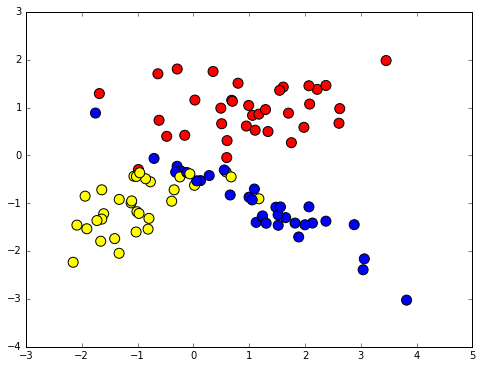

In [28]:
pl.figure(figsize=(8,6))#задаем размеры графика
pl.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]),
           c=classification_problem[1], cmap=colors, s=100)

In [29]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Разделяющие поверхности (взято из семинарского занятия)

In [30]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [31]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

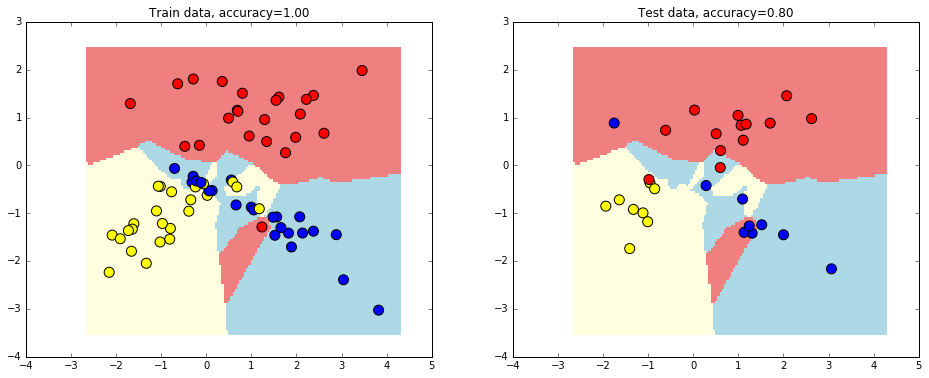

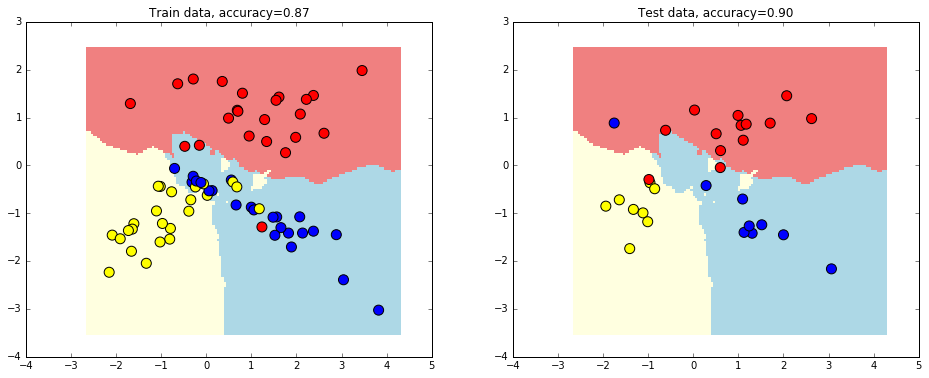

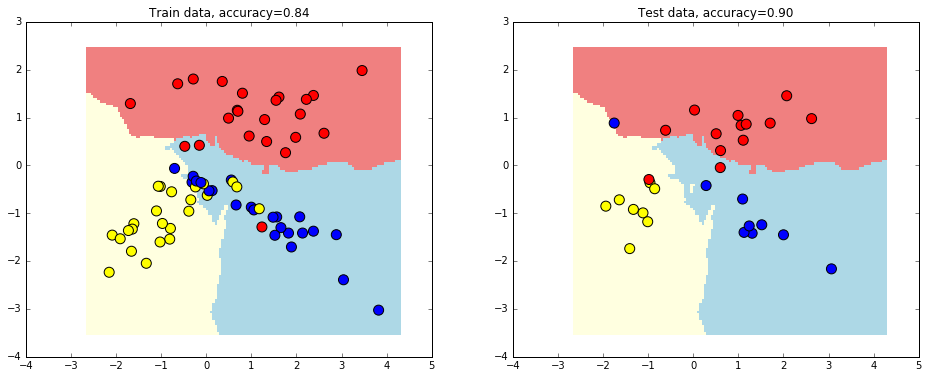

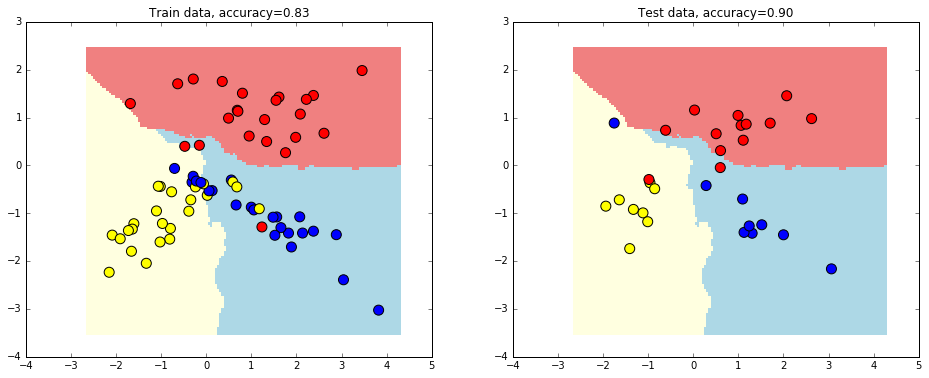

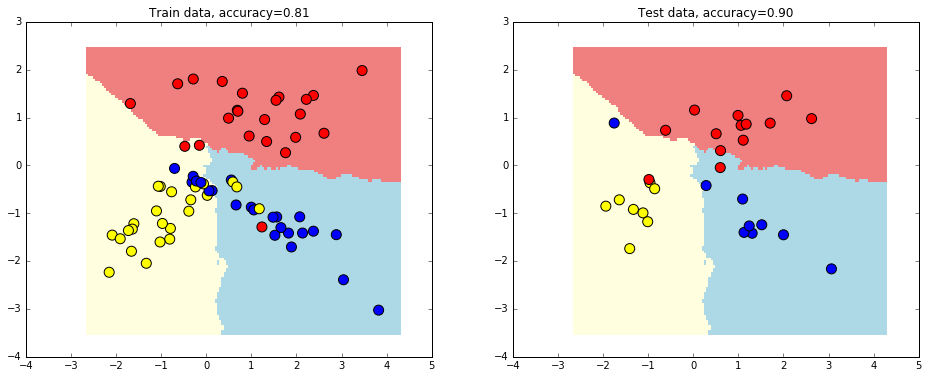

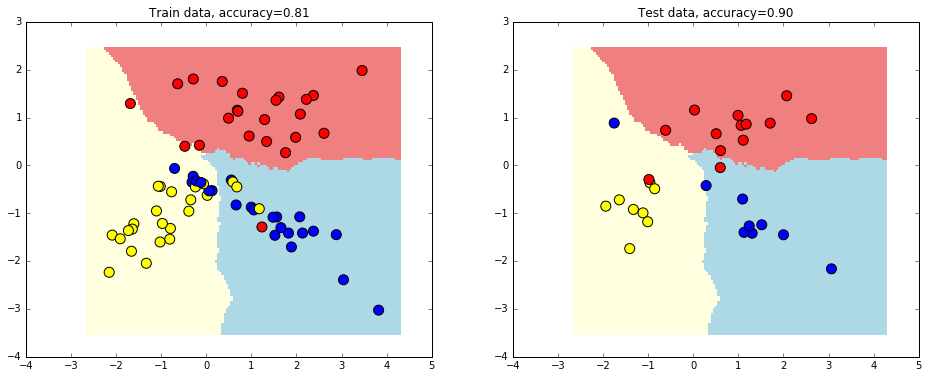

In [32]:
for i in [1, 5, 15, 20, 25, 30]:
    plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=i), train_data,  train_labels, test_data, test_labels)

### Определение оптимального числа соседей с помощью 5-fold cross-validation

Максимальная точность 0.889086352244
достигается при таком количестве соседей: 12


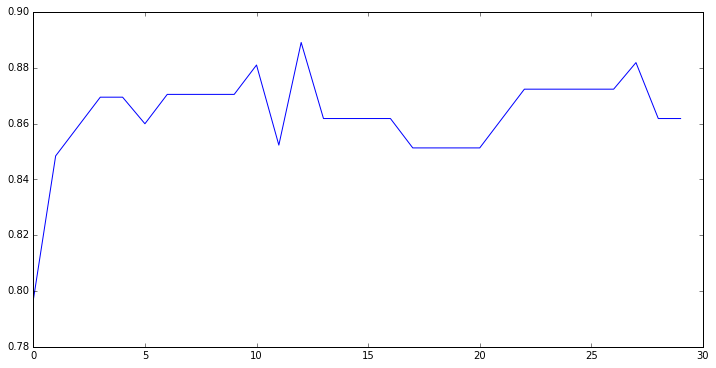

In [33]:
N_max = 30

accuracy = np.zeros(N_max)
for i in range (N_max):
    estimator = neighbors.KNeighborsClassifier(n_neighbors = i+1)
    accuracy[i] = np.mean(cross_val_score(estimator, classification_problem[0], classification_problem[1], cv = 5))
    
print 'Максимальная точность', np.max(accuracy)
print 'достигается при таком количестве соседей:', np.argmax(accuracy)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(N_max), accuracy, label = "accuracy from n_neighbors")

Оптимальное количество соседей получилось равным от 10-15